### Importação e carregamento de Dados

In [13]:
# Bibliotecas basicas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Importando os dados
df = pd.read_csv('mobile_phone_usage/mobile phone usage .csv')

### Modificação das colunas

In [14]:
# Alterando nome da coluna 'ï»¿name' para 'name'
df.rename(columns={'ï»¿name': 'name'}, inplace=True)

# Alterando o nome da coluna 'value' para 'quantidade_em_uso'
df.rename(columns={'value': 'quantidade_em_uso'}, inplace=True)

# Transformando a coluna 'ranking' para o tipo 'object'
df['ranking'] = df['ranking'].astype('object')

df.drop(columns=['slug'], inplace=True)

df.drop(columns=['date_of_information'], inplace=True)

# Transformando a coluna 'quantidade_em_uso' para o tipo 'int64'
df['quantidade_em_uso'] = df['quantidade_em_uso'].str.replace(',', '').astype('int64')

df.head(10)

,name,quantidade_em_uso,ranking,region
0,China,1810000000,1,East and Southeast Asia
1,India,1140000000,2,South Asia
2,United States,386000000,3,North America
3,Indonesia,352000000,4,East and Southeast Asia
4,Russia,245000000,5,Central Asia
5,Nigeria,224000000,6,Africa
6,Japan,219000000,7,East and Southeast Asia
7,Brazil,213000000,8,South America
8,Bangladesh,191000000,9,South Asia
9,Pakistan,189000000,10,South Asia


### Checagem de Saúde da Base de Dados

In [15]:
# Checagem de saúde da base de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               225 non-null    object
 1   quantidade_em_uso  225 non-null    int64 
 2   ranking            225 non-null    object
 3   region             225 non-null    object
dtypes: int64(1), object(3)
memory usage: 7.2+ KB


In [16]:
# Descrição estatística dos dados
df.describe()

,quantidade_em_uso
count,2.250000e+02
mean,3.911035e+07
std,1.498258e+08
min,0.000000e+00
25%,7.520000e+05
50%,7.050000e+06
75%,2.380000e+07
max,1.810000e+09


In [17]:
# Checando valores nulos
df.isnull().sum()

name                 0
quantidade_em_uso    0
ranking              0
region               0
dtype: int64

In [18]:
# Checando valores duplicados
df.duplicated().sum()

np.int64(0)

🔍 Cuidados com Valores Duplicados
É importante verificar se há valores duplicados no conjunto de dados, pois isso pode impactar negativamente as análises.

No entanto, como não foram encontrados registros duplicados, não é necessário adicionar uma coluna de ID. Os nomes dos países já são únicos e podem ser utilizados como identificador principal.

### Distribuição de celulares por região

In [19]:
df_region = df.groupby('region')['quantidade_em_uso'].sum().reset_index()
df_region = df_region.sort_values(by='quantidade_em_uso', ascending=False)
df_region

,region,quantidade_em_uso
4,East and Southeast Asia,3074401000
9,South Asia,1612697000
0,Africa,1360762000
5,Europe,747945427
7,North America,562635000
8,South America,495421000
6,Middle East,454030000
3,Central Asia,354700000
2,Central America and the Caribbean,98779765
1,Australia and Oceania,38456724


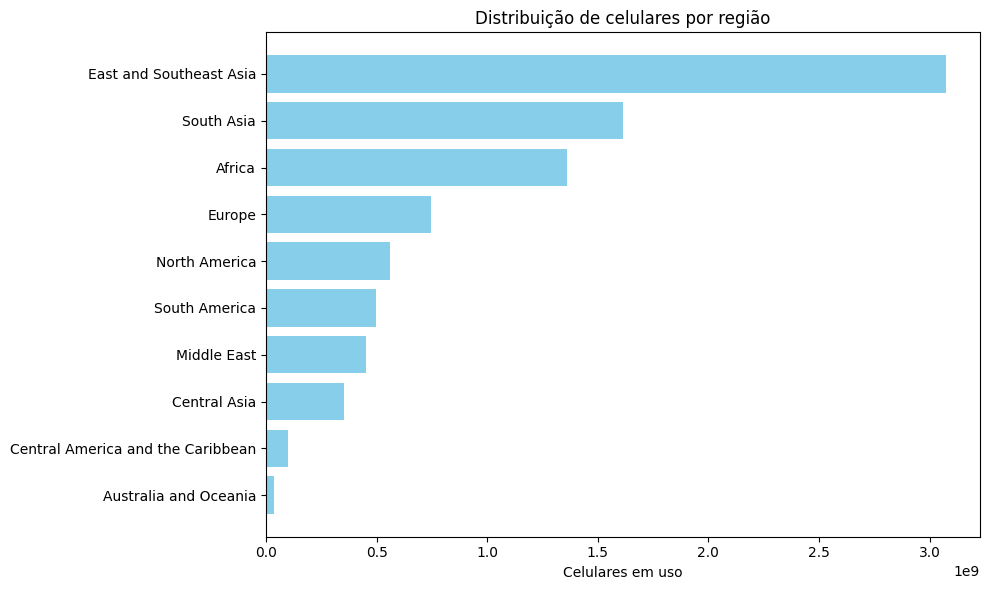

In [20]:
plt.figure(figsize=(10, 6))
plt.barh(df_region['region'], df_region['quantidade_em_uso'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Distribuição de celulares por região')
plt.xlabel('Celulares em uso')
plt.tight_layout()
plt.show()

### Países com maior número de uso de celulares

In [29]:
top_5 = df.groupby('name')['quantidade_em_uso'].sum().reset_index()
top_5 = top_5.sort_values(by='quantidade_em_uso', ascending=False).head(5)

top_5

,name,quantidade_em_uso
42,China,1810000000
94,India,1140000000
213,United States,386000000
95,Indonesia,352000000
166,Russia,245000000


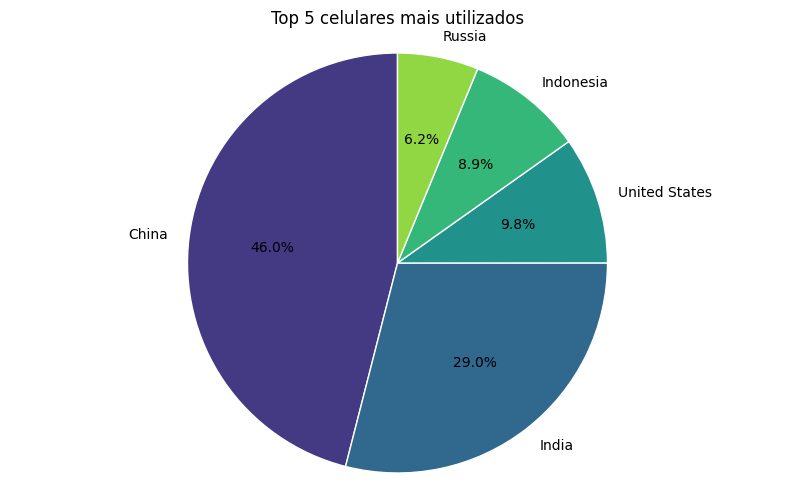

In [30]:
plt.figure(figsize=(10, 6))
plt.pie(
    top_5['quantidade_em_uso'],
    labels=top_5['name'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('viridis', len(top_5)),
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)

plt.title('Top 5 celulares mais utilizados')
plt.axis('equal')
plt.show()

### Média de Usuários em Cada Região

In [33]:
region_avg = df.groupby('region')['quantidade_em_uso'].mean().sort_values(ascending=False)
region_avg = region_avg

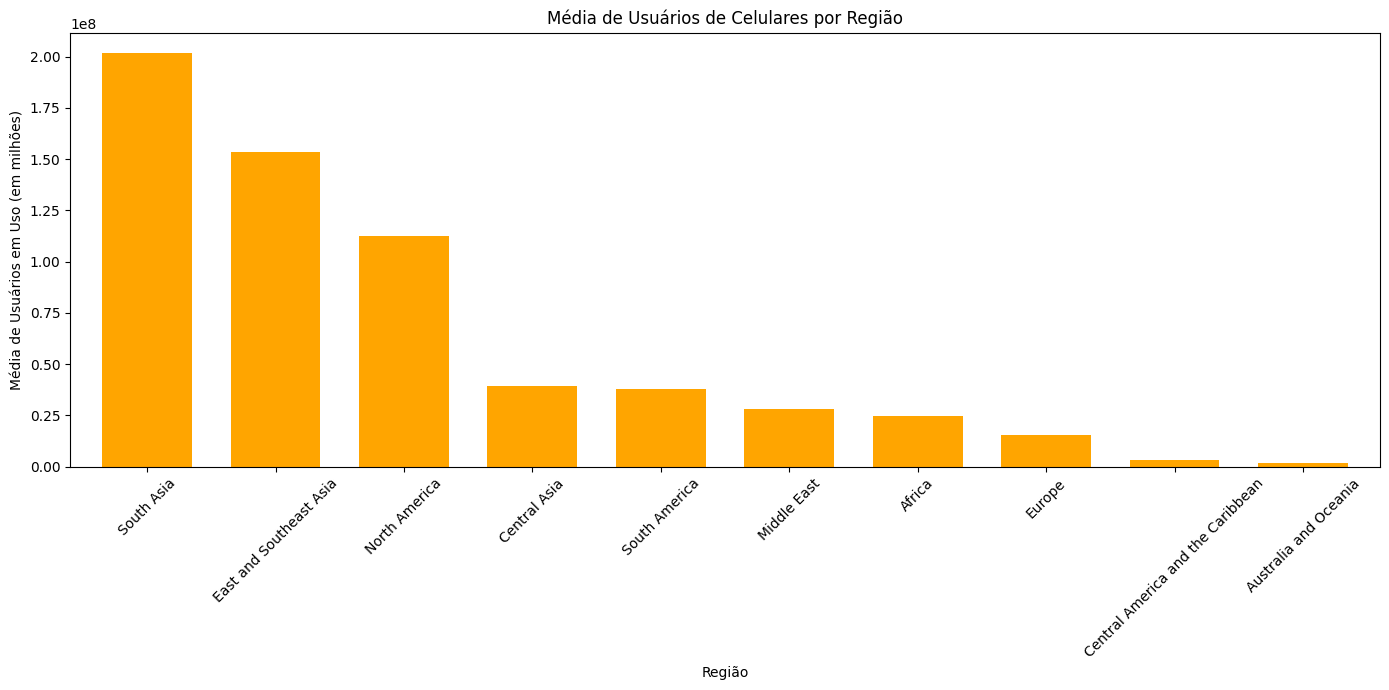

In [32]:
# Gráfico de barras
plt.figure(figsize=(14, 7))
region_avg.plot(kind='bar', color='orange', width=0.7)
plt.title('Média de Usuários de Celulares por Região')
plt.xlabel('Região')
plt.ylabel('Média de Usuários em Uso (em milhões)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Correlação entre Ranking e Número de Usuários

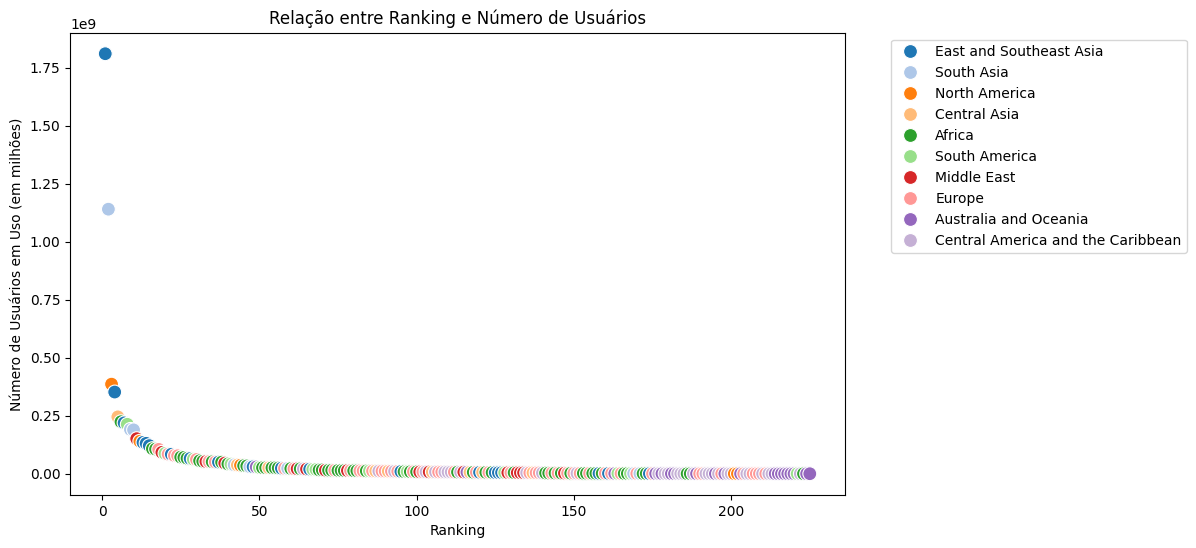

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ranking', y='quantidade_em_uso', hue='region', palette='tab20', s=100)
plt.title('Relação entre Ranking e Número de Usuários')
plt.xlabel('Ranking')
plt.ylabel('Número de Usuários em Uso (em milhões)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Conclusão

### Distribuição regional
A análise por região destacou discrepâncias no uso de celulares ao redor do mundo. Algumas regiões concentram a maior parte dos dispositivos em uso, sugerendio fortes mercados consumidores de tecnologia móvel

### Liderança por país
Países como China, Índia e Estados Unidos, provavelmente apareceram entre os primeiros colocados em termos absolutos, reforçando seu papel dominante no mercado global de telecomunicações